In [39]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [40]:
# choix du nombre de composantes à calculer
n_comp = 6

In [41]:
# import de l'échantillon
data = pd.read_csv("my_courses.csv",decimal=".",index_col=0)

data.head()


,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Initiez-vous_au_Deep_Learning,1.0,8.0,0.0,8.0,2.0,10.0,1.0,2.0,408.0,5801891.0
Initiez-vous_à_Python_pour_l'analyse_de_données,905.0,100.0,0.0,6.0,1.0,11.0,1.0,3.0,63.0,6204541.0
Construisez_un_business_plan,293.0,20.0,0.0,10.0,2.0,13.0,1.0,2.0,135.0,5191546.0
Implémentez_vos_bases_de_données_relationnelles_avec_SQL,252.0,11.0,0.0,6.0,2.0,14.0,1.0,4.0,37.0,6971126.0
Evaluez_les_performances_d'un_modele_de_machine_learning,247.0,0.0,0.0,10.0,2.0,10.0,1.0,1.0,280.0,4297211.0


In [42]:
# selection des colonnes à prendre en compte dans l'ACP ici 
# tu remplaces les noms là par les noms des colonnes de ta base de donnée, mais ces colonnes doivent être discrètes(nombres) 
data_pca = data[["inscription","progression","moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]]


In [43]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index # ou data.index pour avoir les intitulés
features = data.columns


In [44]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [45]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

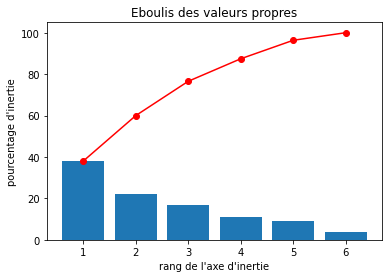

In [46]:
# Eboulis des valeurs propres
display_scree_plot(pca)

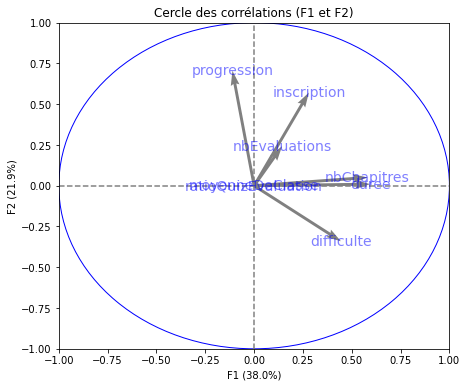

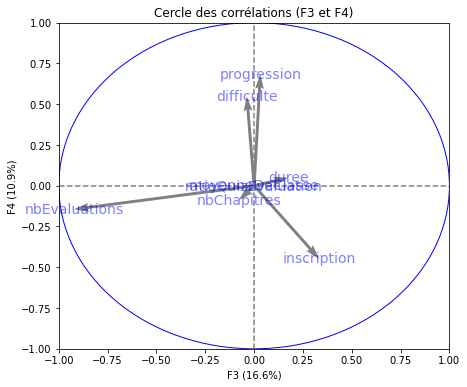

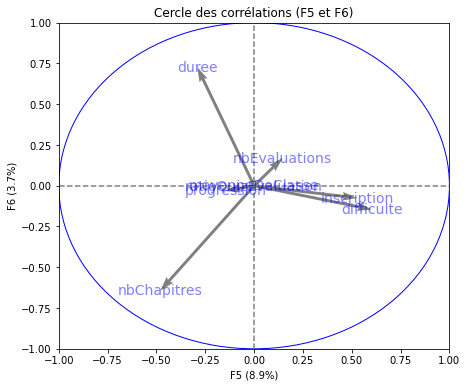

In [47]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


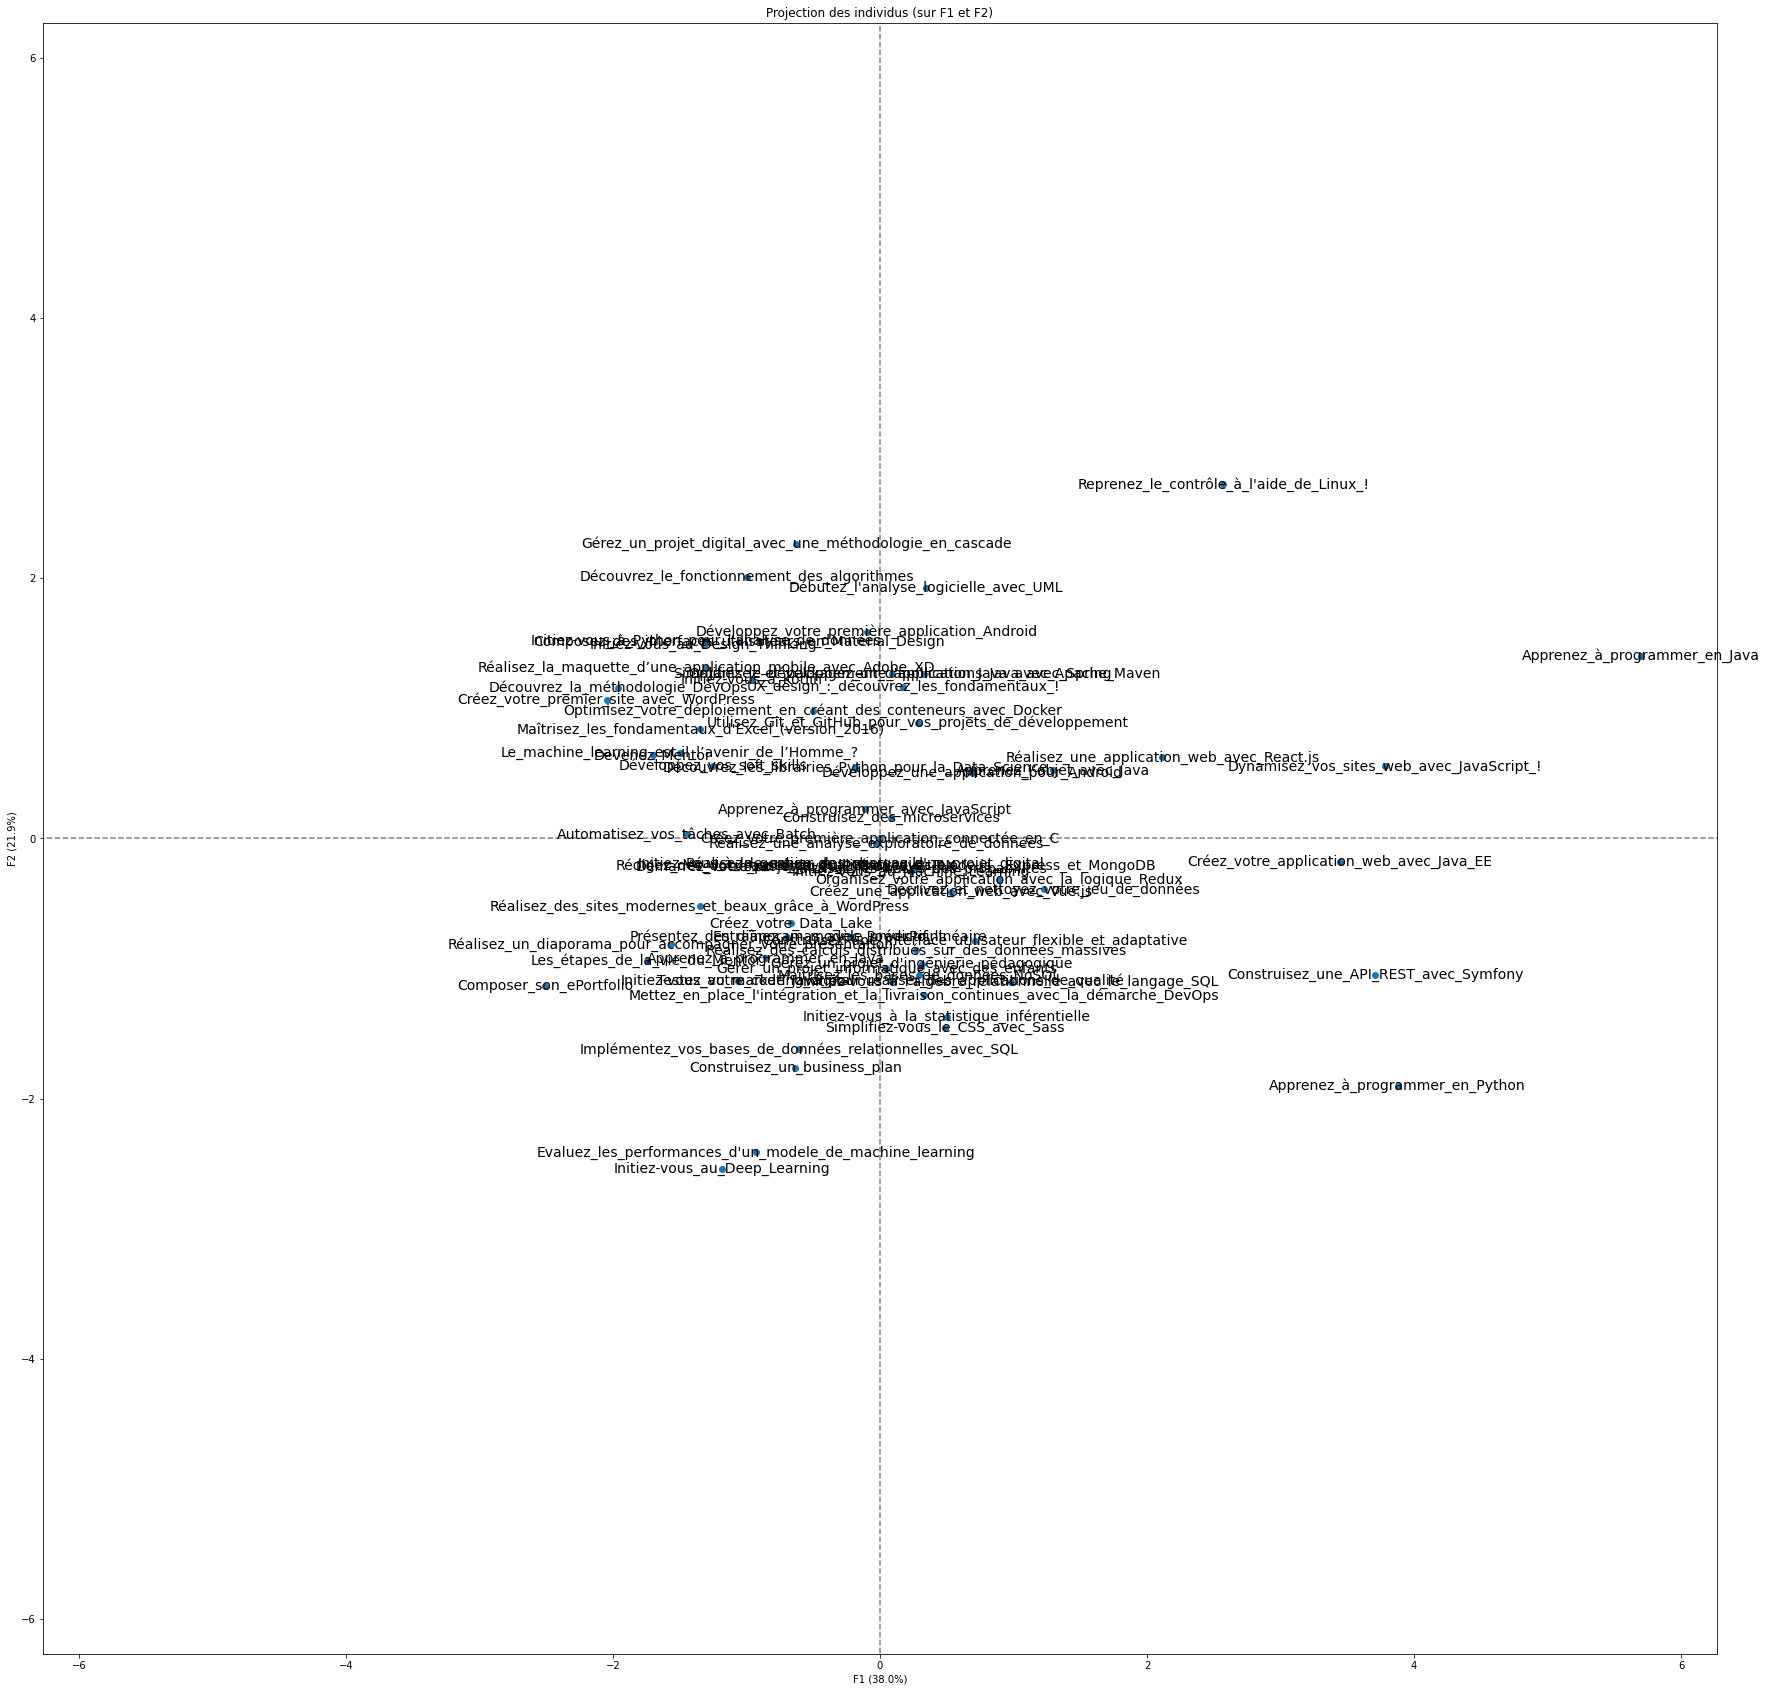

In [48]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

plt.show()